In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

Đầu tiên, chúng em sẽ đọc dữ liệu đã crawl về và lưu trong file `movies.csv`. Vì crawl từ nhiều nguồn nên có thể chúng em sẽ bị trùng dữ liệu. Nên đầu tiên em sẽ xóa các phim có cùng id.

In [2]:
raw_data = pd.read_csv('../../data/movies.csv')
raw_data.drop(raw_data[raw_data['id'].duplicated(keep='last')].index, inplace=True)
raw_data.head(5)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,...,latin_america_gross,china_opening,china_gross,domestic,international,worldwide,by_release_opening,by_release_gross,by_region_opening,by_region_gross
0,False,/3V4kLQg0kSqPLctI5ziYWabAZYF.jpg,"[878, 28, 12]",912649,en,Venom: The Last Dance,Eddie and Venom are on the run. Hunted by both...,3197.278,/aosm8NMQ3UyoBVpSxyimorCQykC.jpg,2024-10-22,...,20365630.0,0.0,14700000.0,128094490.0,308500000.0,436594490.0,NaN,NaN,NaN,NaN
1,False,/18TSJF1WLA4CkymvVUcKDBwUJ9F.jpg,"[27, 53, 9648]",1034541,en,Terrifier 3,Five years after surviving Art the Clown's Hal...,2204.248,/l1175hgL5DoXnqeZQCcU3eZIdhX.jpg,2024-10-09,...,3556242.0,NaN,NaN,53981071.0,31395883.0,85376954.0,NaN,NaN,NaN,NaN
2,False,/v9acaWVVFdZT5yAU7J2QjwfhXyD.jpg,"[16, 878, 10751]",1184918,en,The Wild Robot,"After a shipwreck, an intelligent robot called...",1868.856,/wTnV3PCVW5O92JMrFvvrRcV39RU.jpg,2024-09-12,...,42402473.0,3207589.0,7133654.0,137913995.0,171143000.0,309056995.0,NaN,NaN,NaN,NaN
3,False,/2fxnTXr8NwyTFkunkimJkGkhqfy.jpg,"[18, 28, 27]",1118031,es,Apocalipsis Z: el principio del fin,When a kind of rabies that transforms people i...,1861.349,/wIGJnIFQlESkC2rLpfA8EDHqk4g.jpg,2024-10-04,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,False,/8mjYwWT50GkRrrRdyHzJorfEfcl.jpg,"[28, 12, 18]",558449,en,Gladiator II,Years after witnessing the death of the revere...,1978.412,/2cxhvwyEwRlysAmRH4iodkvo0z5.jpg,2024-11-13,...,8405072.0,NaN,NaN,0.0,87000000.0,87000000.0,NaN,NaN,NaN,NaN


In [14]:
raw_data.describe()

,id,popularity,vote_average,vote_count,budget,revenue,runtime,domestic_opening,domestic_gross,asia_pacific_opening,...,latin_america_gross,china_opening,china_gross,domestic,international,worldwide,by_release_opening,by_release_gross,by_region_opening,by_region_gross
count,3.927000e+03,3927.000000,3927.000000,3927.000000,3.927000e+03,3.927000e+03,3927.000000,1.518000e+03,1.518000e+03,1.540000e+03,...,1.208000e+03,3.530000e+02,3.530000e+02,3.833000e+03,3.833000e+03,3.833000e+03,850.0,8.500000e+02,8.470000e+02,847.000000
mean,4.293527e+05,66.083126,6.502123,3113.550038,3.393761e+07,1.199656e+08,103.717851,1.932014e+07,6.484818e+07,6.369968e+06,...,1.396252e+07,1.004790e+07,3.896409e+07,5.026741e+07,7.192626e+07,1.222354e+08,0.0,1.109382e+08,2.400321e+08,31322.135773
std,4.416629e+05,117.538308,1.440878,4508.825565,5.508691e+07,2.312152e+08,29.431753,2.521313e+07,7.925413e+07,1.133914e+07,...,2.295382e+07,2.041059e+07,6.511112e+07,8.984725e+07,1.519430e+08,2.345168e+08,0.0,1.297384e+08,3.325186e+08,24405.029238
min,1.100000e+01,15.491000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,7.430000e+02,0.000000e+00,...,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.880000e+02,160.000000
25%,1.214150e+04,30.092500,6.100000,135.500000,0.000000e+00,0.000000e+00,91.000000,2.339740e+06,1.206771e+07,2.204978e+05,...,1.522962e+06,0.000000e+00,5.190000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.947935e+07,3.160000e+07,11641.000000
50%,2.879480e+05,40.918000,6.700000,1351.000000,7.500000e+06,1.977585e+07,103.000000,1.262275e+07,4.419579e+07,2.048909e+06,...,5.966522e+06,5.521600e+05,1.695254e+07,5.900000e+06,5.244929e+06,2.053076e+07,0.0,6.432012e+07,1.022472e+08,24480.000000
75%,8.238140e+05,63.355500,7.300000,4165.000000,4.500000e+07,1.421200e+08,118.000000,2.551298e+07,9.003266e+07,7.445090e+06,...,1.639072e+07,1.074746e+07,4.880571e+07,6.520713e+07,7.659408e+07,1.444927e+08,0.0,1.617373e+08,3.145851e+08,45820.500000
max,1.383321e+06,3197.278000,10.000000,36538.000000,4.600000e+08,2.923706e+09,242.000000,3.571150e+08,8.583730e+08,1.623613e+08,...,2.728488e+08,1.759613e+08,6.321003e+08,9.366622e+08,2.138484e+09,2.923706e+09,0.0,9.366622e+08,2.918546e+09,122142.000000


Mỗi hàng dữ liệu chứa thông tin về 1 phim, do chúng em tổng hợp từ `The Movie DB` và `Box Office Mojo`

In [5]:
raw_data.dtypes

adult                                       bool
backdrop_path                             object
genre_ids                                 object
id                                         int64
original_language                         object
original_title                            object
overview                                  object
popularity                               float64
poster_path                               object
release_date                              object
title                                     object
video                                       bool
vote_average                             float64
vote_count                                 int64
budget                                     int64
genres                                    object
imdb_id                                   object
production_companies                      object
production_countries                      object
revenue                                    int64
runtime             

Thông tin về các cột lần lượt là:
- adult: có bắt buộc có người lớn không
- backdrop_path:
- genre_ids: thể loại phim đã được đánh dấu bằng các con số
- id: id của phim
- original_language: ngôn ngữ ban đầu của phim
- origianl_title: tiêu đề ban đầu
- overview: giới thiệu chung về phim
- popularity: 2 trang web sẽ đánh số dựa trên lượt tìm kiếm(độ nổi tiếng), càng cao là phim càng nổi
- poster_path: link dẫn đến poster
- release_date: ngày ra mắt
- title: tiêu đề phim
- video:
- vote_average: đánh giá trung bình
- vote_count: số lượng đánh giá
- budget: ngân sách đầu tư
- genres: thể loại phim(bằng chữ)
- imdb_id:
- production_companies: công ty sản xuất
- production_countries: đất nước sản xuất
- revenue: lợi nhuận
- runtime: thời gian phim
- status: trạng thái phim
- tagline:
- spoken_languagues: ngôn ngữ phim
- các cột opening: 
- các cột gross: doanh thu tổng ở các khu vực
- domestic: doanh thu nội địa
- international: doanh thu quốc tế
- worldwide: tổng doanh thu trên thế giới
- by_release_opening:
- by_release_gross:
- by_region_opening:
- by_region_gross:

Đầu tiên em sẽ thống kê tỉ lệ `True` ở các cột kiểu bool.

In [7]:
true_percent = raw_data.select_dtypes(include=['bool']).apply(lambda col: (col == True).mean() * 100)
print(true_percent)

adult    0.0
video    0.0
dtype: float64


Với các cột kiểu `numerial`, em sẽ thống kê số giá trị missing.

In [8]:
numerical_columns = raw_data.select_dtypes(include=['number'])
missing_counts = numerical_columns.isnull().sum()

# Tính tỷ lệ phần trăm giá trị missing
missing_percent = (missing_counts / len(numerical_columns)) * 100

print(missing_percent)

id                                        0.000000
popularity                                0.000000
vote_average                              0.000000
vote_count                                0.000000
budget                                    0.000000
revenue                                   0.000000
runtime                                   0.000000
domestic_opening                         61.344538
domestic_gross                           61.344538
asia_pacific_opening                     60.784314
asia_pacific_gross                       60.784314
europe_middle_east_and_africa_opening    59.180036
europe_middle_east_and_africa_gross      59.180036
latin_america_opening                    69.238605
latin_america_gross                      69.238605
china_opening                            91.010950
china_gross                              91.010950
domestic                                  2.393685
international                             2.393685
worldwide                      

Với các cột kiểu `object`, em sẽ xem xét có bao nhiêu giá trị

In [9]:
object_columns = raw_data.select_dtypes(include=['object'])

# Thống kê số lượng và tỷ lệ từng giá trị
for col in object_columns.columns:
    print(f"\nThống kê cho cột: {col}")
    value_counts = object_columns[col].value_counts()  # Số lượng từng giá trị
    percentages = object_columns[col].value_counts(normalize=True) * 100  # Tỷ lệ phần trăm
    
    # Kết hợp kết quả
    summary = pd.DataFrame({'Count': value_counts, 'Percentage (%)': percentages})
    print(summary)


Thống kê cho cột: backdrop_path
                                  Count  Percentage (%)
backdrop_path                                          
/3V4kLQg0kSqPLctI5ziYWabAZYF.jpg      1        0.025887
/z7JEMQuxHWZtGb1DxZ2egjOlPcb.jpg      1        0.025887
/oPkmyBjJFQmgAXfiK7bBUo7H2Xs.jpg      1        0.025887
/nUbWdUmVxln18ZWi8spqInbTQ0J.jpg      1        0.025887
/h5BvesqaxL7V3vl1CmaR8waGyiM.jpg      1        0.025887
...                                 ...             ...
/q76O87V8PEdcmkGzAIHEciXG9nT.jpg      1        0.025887
/llyfug8S5O3ha3pfZpdKKmOqg4t.jpg      1        0.025887
/fLEsa5SKTFgrdUGMHbsWomniak6.jpg      1        0.025887
/aAf9YqMpdFcsChf949aEFjS81x4.jpg      1        0.025887
/hPTaANKrpghMQeRIOcPJbJA4Yia.jpg      1        0.025887

[3863 rows x 2 columns]

Thống kê cho cột: genre_ids
                        Count  Percentage (%)
genre_ids                                    
[18]                      167        4.252610
[27, 53]                  131        3.335880
[

Ta thấy số lượng giá trị khác nhau là rất lớn. Duy chỉ có cột `status` là hớn 98% giá trị là `released`

Tiếp theo, chúng em sẽ so sánh các cột có ý nghĩa gần giống nhau như đã đề cập ở phần giải thích nghĩa các cột.

In [11]:
# Kiểm tra số lượng giá trị giống nhau giữa 2 cột
same_values = (raw_data['original_title'] == raw_data['title'])

# Đếm số lượng giống nhau
count_same = same_values.sum()

# Tính tỷ lệ phần trăm giống nhau
percent_same = (count_same / len(raw_data)) * 100

print(f"Số lượng giá trị giống nhau: {count_same}")
print(f"Tỷ lệ phần trăm giống nhau: {percent_same:.2f}%")

Số lượng giá trị giống nhau: 3108
Tỷ lệ phần trăm giống nhau: 79.14%


Tỉ lệ giống nhau là khá cao, nên chúng em sẽ xóa bớt 1 cột

In [13]:
# Kiểm tra số lượng giá trị giống nhau giữa 2 cột
same_values = (raw_data['original_language'] == raw_data['spoken_languages'])

# Đếm số lượng giống nhau
count_same = same_values.sum()

# Tính tỷ lệ phần trăm giống nhau
percent_same = (count_same / len(raw_data)) * 100

print(f"Số lượng giá trị giống nhau: {count_same}")
print(f"Tỷ lệ phần trăm giống nhau: {percent_same:.2f}%")

Số lượng giá trị giống nhau: 0
Tỷ lệ phần trăm giống nhau: 0.00%


Tuy không có mẫu nào giống nhau nhưng khi xem xét kĩ hơn, em thấy cột origial_languague đã ghi ngôn ngữ được mã hóa như là `en` còn cột spoken_languages thì ghi `english`. Điều này làm chúng ta thấy nó không có giá trị trùng nhưng về mặt ý nghĩa thì nó vẫn giống nhau. Sau quá trình xem xét em thấy có rất nhiều trường hợp như vậy, nên chúng em cũng sẽ xóa bớt 1 cột.

Sau khi xem qua các mẫu của dữ liệu, chúng em quyết định sẽ xóa các cột mà chúng em sẽ không dùng tới như các cột `backdrop_path`(chứa link), `overview`(giới thiệu phim), `video`(toàn bộ đều là true),... cùng với các cột đã có dữ liệu trùng nhiều ở cột khác.

In [182]:
unnesscarry_columns = ['backdrop_path', 'overview', 'poster_path', 'video', 'original_language', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline']
duplicated_columns = ['original_title' , 'genres', 'revenue']   

data = raw_data.drop(columns=unnesscarry_columns + duplicated_columns)


Tiếp theo, như đã phân tích ở trên, có khá nhiều cột có tỉ lệ mất dữ liệu cao, nhưng cao bao nhiêu là bị xóa?

Đầu tiên chúng em sẽ visualize lên và thấy cũng có khá nhiều cột có ngưỡng mất dữ liệu khoảng 0.6. Các cột này chênh lệch đáng kể với những cột còn lại

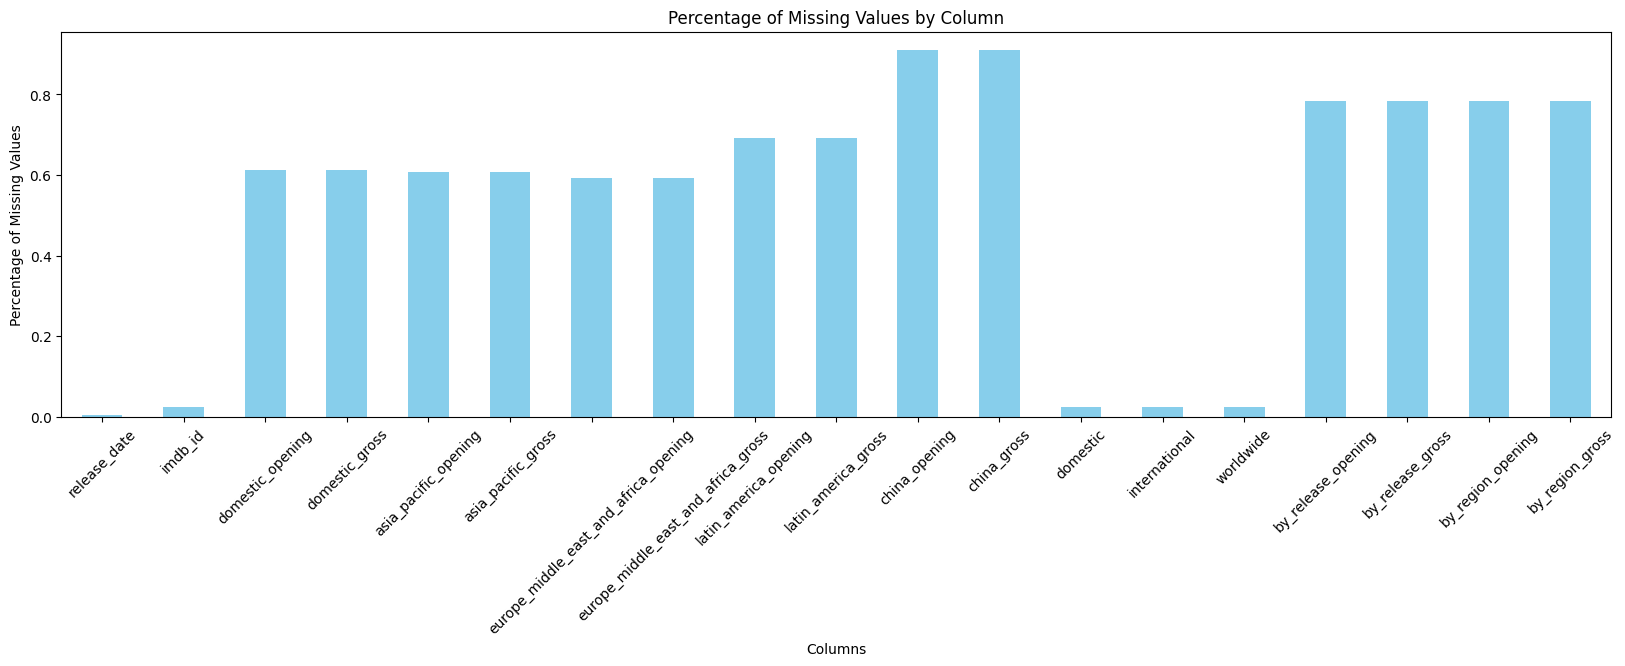

In [183]:
missing_values = data.isnull().mean()
missing_values = missing_values[missing_values > 0]
missing_values.plot(kind='bar', figsize=(20, 5), color='skyblue')
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.show()

Sau khi thảo luận, nhóm chúng em đã quyết định sẽ để ngưỡng là 0.5, chúng em sẽ xóa các cột mất nhiều hơn 50% dữ liệu

In [184]:
threshold = 0.5
columns_to_drop = missing_values[missing_values > threshold].index
columns_to_drop

Index(['domestic_opening', 'domestic_gross', 'asia_pacific_opening',
       'asia_pacific_gross', 'europe_middle_east_and_africa_opening',
       'europe_middle_east_and_africa_gross', 'latin_america_opening',
       'latin_america_gross', 'china_opening', 'china_gross',
       'by_release_opening', 'by_release_gross', 'by_region_opening',
       'by_region_gross'],
      dtype='object')

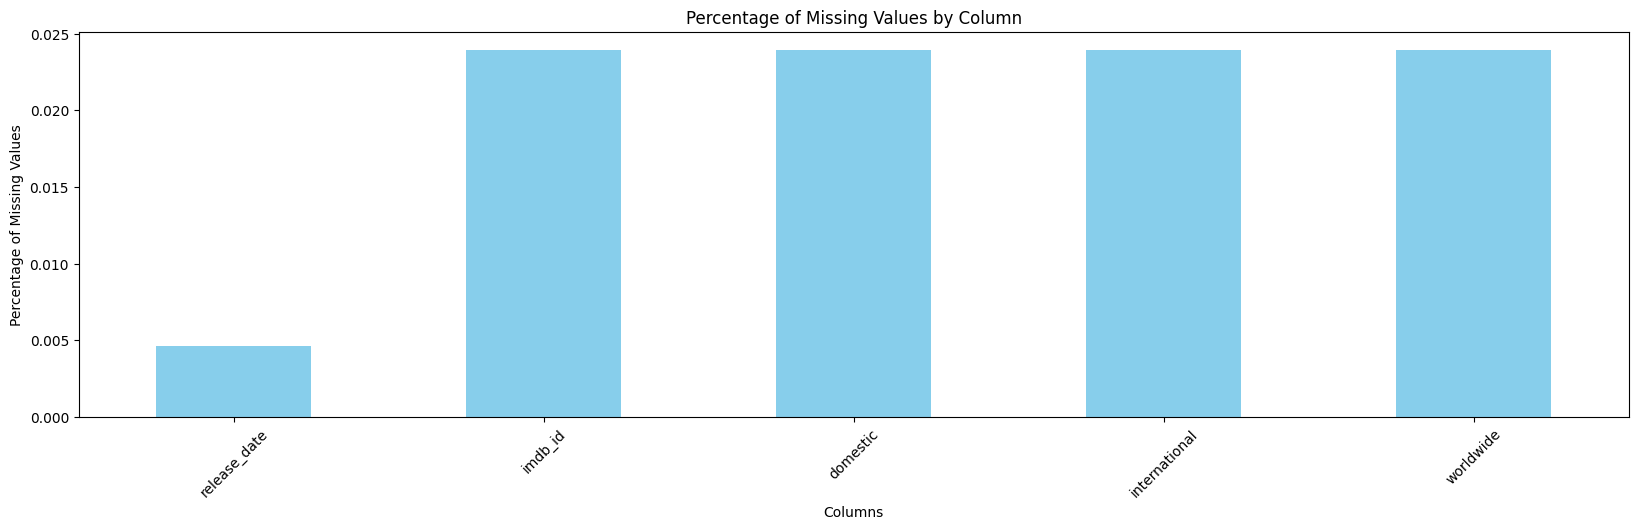

In [185]:
data.drop(columns=columns_to_drop, inplace=True)

missing_values = data.isnull().mean()
missing_values = missing_values[missing_values > 0]
missing_values.plot(kind='bar', figsize=(20, 5), color='skyblue')
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.show()

Tiếp theo, chúng em nhận thấy `worldwide` hoặc `budget` có những dòng bằng 0, điều này là khá vô lí. Nên chúng em sẽ xóa các dòng này đi

In [186]:
drop_index = data[(data['worldwide'] == 0) | (data['budget'] == 0)].index
data = data.drop(drop_index, axis=0).reset_index(drop=True)
data.shape

(2276, 14)

In [187]:
data.dropna(subset=data.columns.difference(['imdb_id']), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2275 entries, 0 to 2275
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adult          2275 non-null   bool   
 1   genre_ids      2275 non-null   object 
 2   id             2275 non-null   int64  
 3   popularity     2275 non-null   float64
 4   release_date   2275 non-null   object 
 5   title          2275 non-null   object 
 6   vote_average   2275 non-null   float64
 7   vote_count     2275 non-null   int64  
 8   budget         2275 non-null   int64  
 9   imdb_id        2275 non-null   object 
 10  runtime        2275 non-null   int64  
 11  domestic       2275 non-null   float64
 12  international  2275 non-null   float64
 13  worldwide      2275 non-null   float64
dtypes: bool(1), float64(5), int64(4), object(4)
memory usage: 251.0+ KB


Tiếp theo, chúng em sẽ đổi giá trị từ `release_date` thành giá trị `years_from_release` chứa số năm tính từ thời điểm ra mắt đến hiện tại(2024).

In [188]:
data['years_from_release'] = 2024 - pd.to_datetime(data['release_date']).dt.year
data = data.drop(columns=['release_date'])

Vì để thuận tiện cho việc tính toán, chạy mô hình về sau, chúng em sẽ chuyển các thể loại phim thành ma trận one hot encoding

In [189]:
with open('../../data/genres.json') as f:
    genre_ids = {i['id']: 'genre_' + i['name'].replace(' ', '_') for i in json.load(f)['genres']}
for id, genre in genre_ids.items():
    data[genre] = data['genre_ids'].apply(lambda x: str(id) in x)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2275 entries, 0 to 2275
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2275 non-null   bool   
 1   genre_ids              2275 non-null   object 
 2   id                     2275 non-null   int64  
 3   popularity             2275 non-null   float64
 4   title                  2275 non-null   object 
 5   vote_average           2275 non-null   float64
 6   vote_count             2275 non-null   int64  
 7   budget                 2275 non-null   int64  
 8   imdb_id                2275 non-null   object 
 9   runtime                2275 non-null   int64  
 10  domestic               2275 non-null   float64
 11  international          2275 non-null   float64
 12  worldwide              2275 non-null   float64
 13  years_from_release     2275 non-null   int32  
 14  genre_Action           2275 non-null   bool   
 15  genre_Adv

In [190]:
data = data.loc[:, (data != 0).any(axis=0)]
cleaned_data = data.drop(columns=['genre_ids'])

In [191]:
cleaned_data.set_index('id', inplace=True)

In [192]:
cols = [col for col in cleaned_data.columns if col not in ['domestic', 'international', 'worldwide']]
cleaned_data = cleaned_data[cols + ['domestic', 'international', 'worldwide']]

In [193]:
cleaned_data.to_csv('../../data/cleaned_movies.csv', index=False)